## Crop and Fertilizer Recommendation System using ML

In [96]:
# Importing necessary libraries with error handling
try:
    import numpy as np  # For numerical computations
    import pandas as pd  # For data manipulation
    import matplotlib.pyplot as plt  # For data visualization
    import seaborn as sns  # For advanced statistical visualization
    
    plt.ion()  # Enable interactive mode for Matplotlib
    
except ImportError as e:
    missing_lib = str(e).split(" ")[2]  # Extract the name of the missing library
    print(f"{missing_lib.capitalize()} is not installed. Please install the required libraries.")
    raise ImportError(f"{missing_lib} is required for this code to run.")


In [97]:
import os  #  Importing OS Module  To check if the file exists

# Defining  the file path
file_path = "Crop_recommendation.csv"

# Check if the file exists
if not file_path.endswith('.csv'):
    print(f"Error: The file '{file_path}' is not a CSV file.")
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
    crop = None
else:
    try:
        # Load the dataset into a pandas DataFrame
        crop = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
        crop = None
    except pd.errors.ParserError:
        print(f"Error: Failed to parse the file '{file_path}'. Please check the file format.")
        crop = None


Dataset loaded successfully.


In [98]:
# checking the 'crop' DataFrame is none or empty
if crop is None or crop.empty:
    # If the dataframe is either None or Empty, print an error message
    print("Error: The dataset could not be loaded or is empty.")
else:
    # If the DataFrame is loaded and not empty, display the first ten rows of the dataset
    print("First ten (10) rows of the dataset:")
    print(crop.head(10))
    # Print a separator line before displaying the last ten rows
    print("\nLast ten (10) rows of the dataset:")
    print(crop.tail(10))


First ten (10) rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

Last ten (10) rows of the dataset:
        N   P   K  temperature   humidity        ph    rainfall   label
2190  103  40  30    27.309018  55.196224  6.348316  141.483164  coffee
2191  118  31  34    27.548230  62.881792  6.123796  181.4

In [99]:

if crop.shape[0] == 0: # Displays the number of rows in the DataFrame.
     print("The dataset has no rows .Please check the data source.")
elif crop.shape[1] == 0: # Displays the number of columns in the DataFrame.
    print("The dataset has no columns.Please check the file format.")
else: # Displays both the number of rows as well as columns in the DataFrame.
    print(f"The dataset contains {crop.shape[0]} rows and {crop.shape[1]} columns.")


The dataset contains 2200 rows and 8 columns.


In [100]:
# Displaying Basic information about the Dataset.
if crop is not None and not crop.empty:
    print("Displaying basic information about the dataset:")
    crop.info()
    # Showing  the number of missing values in each column.
    print("\nMissing values per column:")
    print(crop.isnull().sum())
    
    
else:
    print("The dataset is empty or not loaded.")


Displaying basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [101]:
# Checking for the number of duplicated rows in the dataset
duplicates = crop.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

# Removing duplicate rows if present.
if duplicates > 0:
    print("Removing duplicate rows...")
    crop = crop.drop_duplicates()  # Remove duplicates
    print(f"Duplicates removed. The dataset now has {crop.shape[0]} rows.")
else:
    print("No duplicates found in the dataset.")


Number of duplicated rows: 0
No duplicates found in the dataset.


In [102]:
# Summary statistics for numerical and categorical columns
print(crop.describe())


                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [103]:
# Displaying column names in a list format.
print("column names in the dataset:")

print(list(crop.columns))


column names in the dataset:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [104]:
# checking  the target distribution
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [105]:
# Extract features excluding the label
attributes = crop.columns.to_list()
attributes.remove('label')
print(attributes)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


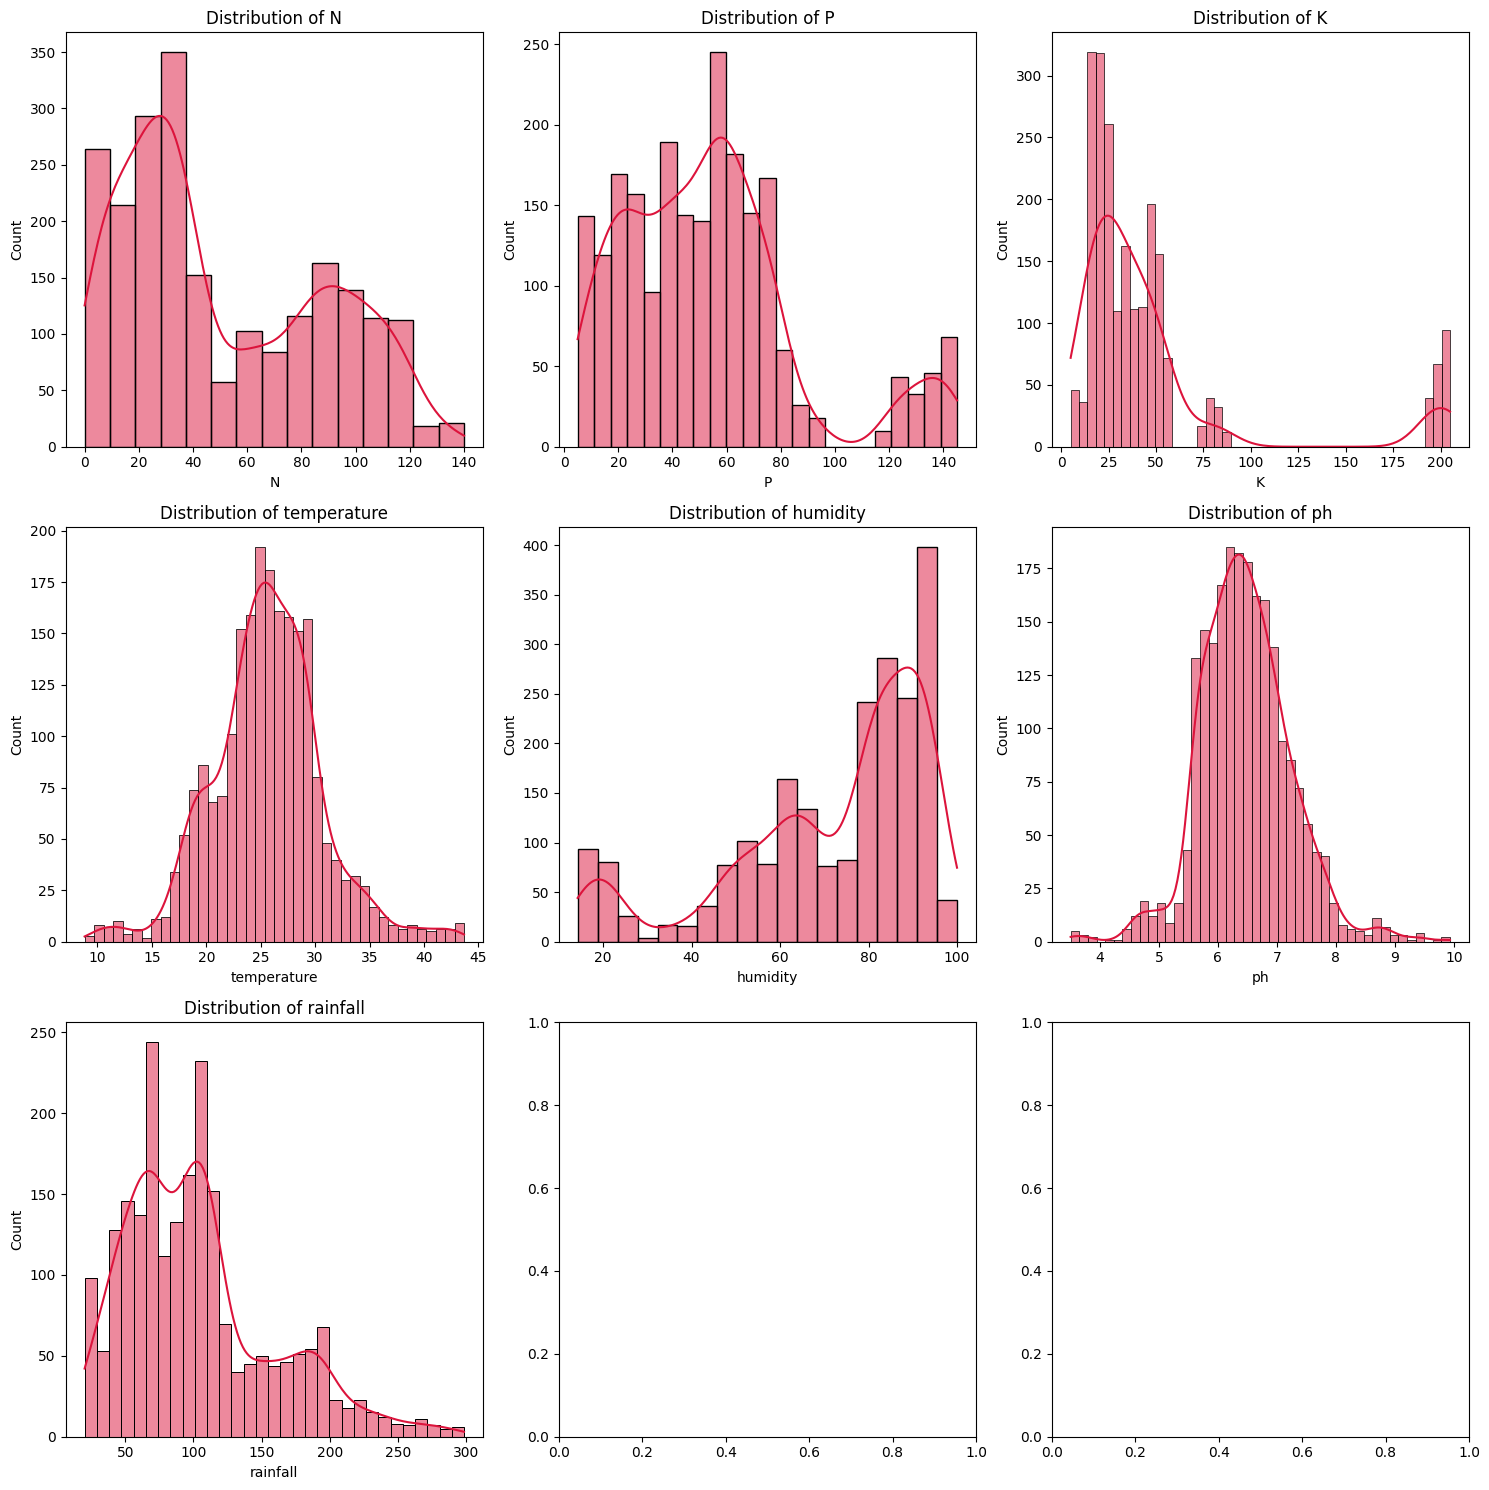

In [106]:
#visualize the distribution of each attribute
fig, ax = plt.subplots(3, 3,figsize=(15, 15))
for attr, subplot in zip(attributes, ax.flatten()):
    sns.histplot(crop[attr], ax=subplot,kde=True,color='crimson') # Histogram with KDE plot
    subplot.set_title(f'Distribution of {attr}', fontsize=12)
plt.tight_layout()
plt.show()




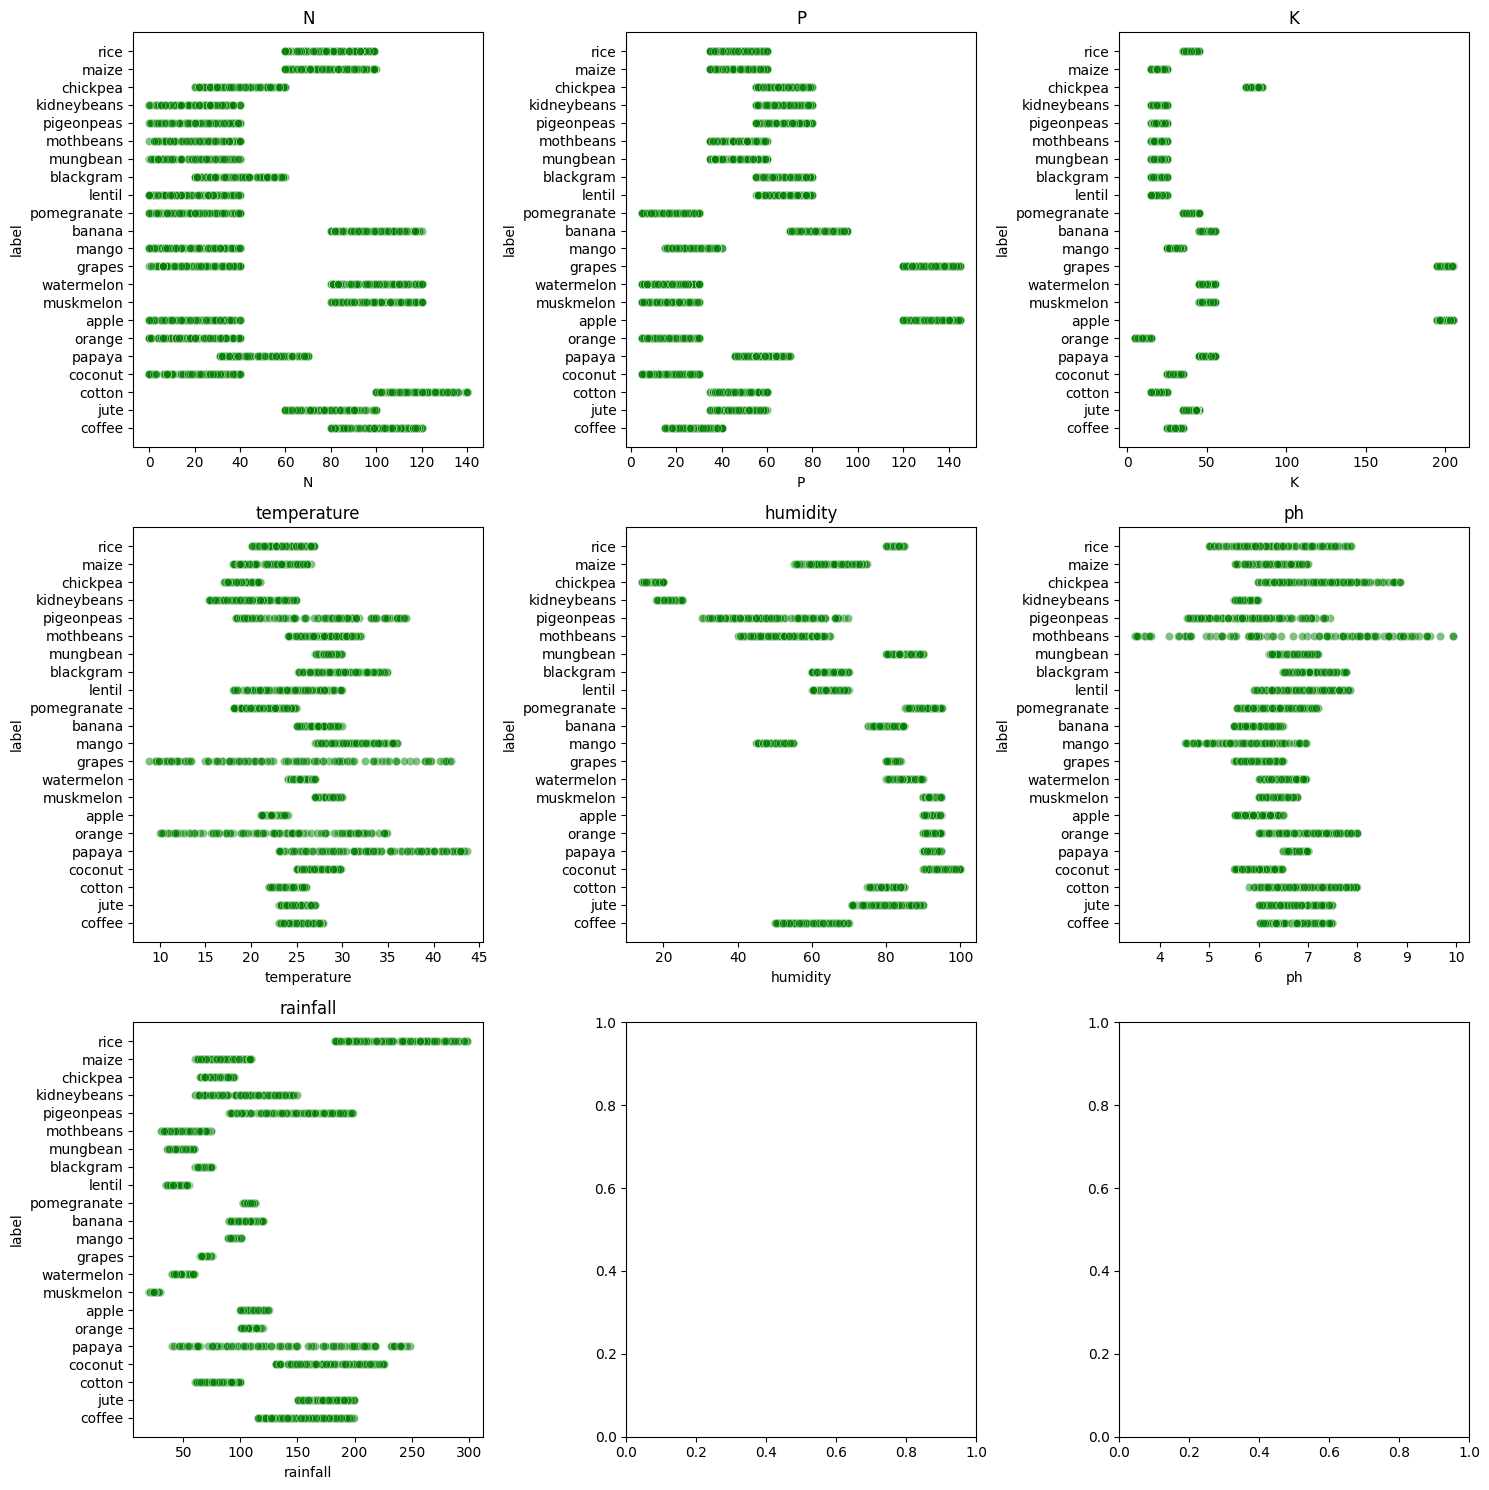

In [107]:
# Scatter plots of attributes vs label to understand relationships
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for attr, subplot in zip(attributes, ax.flatten()):
    sns.scatterplot(x=crop[attr], y=crop['label'], ax=subplot, alpha=0.5, color='green')  # Scatter plot for trend analysis
    subplot.set_title(f'{attr}', fontsize=12)
plt.tight_layout()
plt.show()

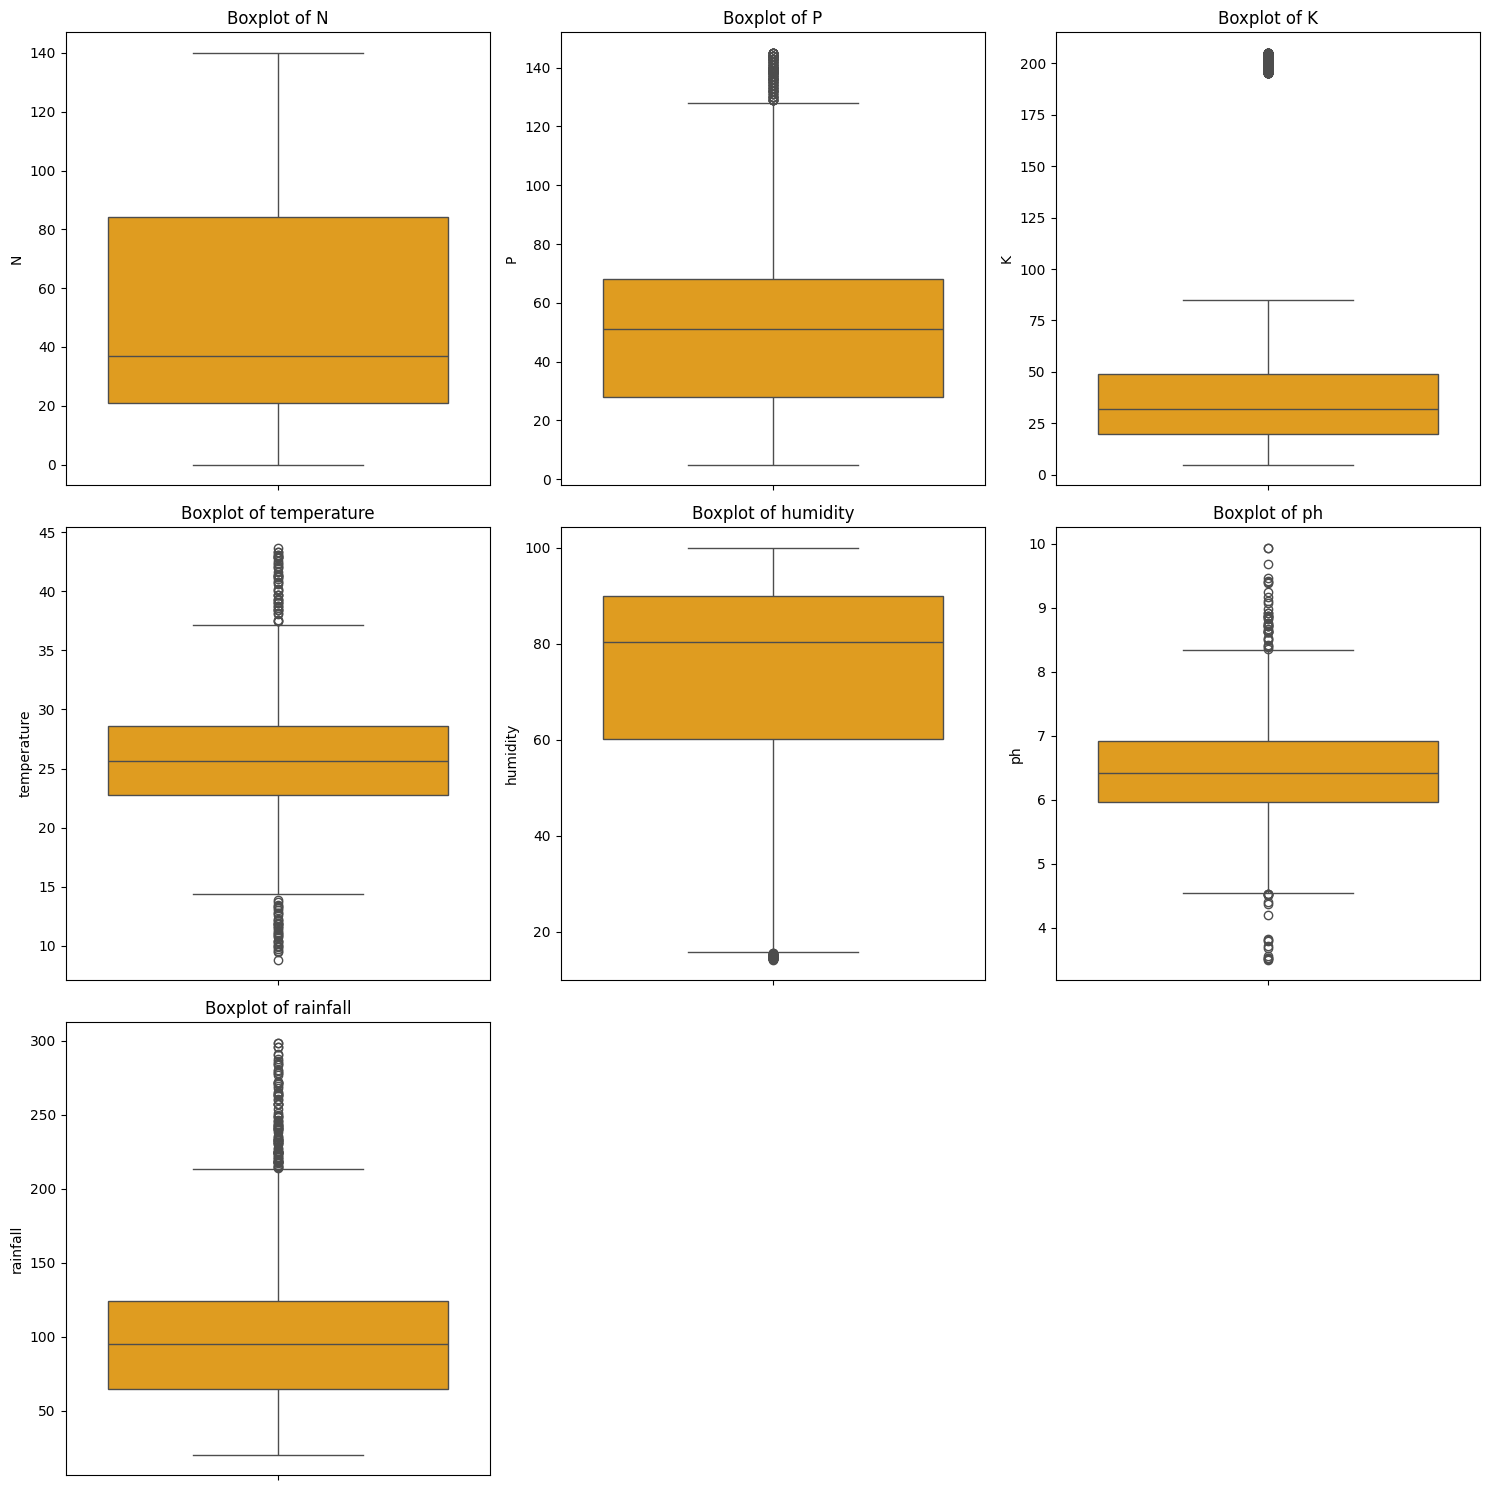

In [108]:
# Detecting outliers using boxplot
num_attributes = len(attributes)
rows = (num_attributes // 3) + (num_attributes % 3 > 0)  # Dynamic row calculation
fig, ax = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust height dynamically

for attr, subplot in zip(attributes, ax.flatten()):
    sns.boxplot(y=crop[attr], ax=subplot, color='orange')  # Boxplot to identify outliers
    subplot.set_title(f'Boxplot of {attr}', fontsize=12)

# Hide empty subplots
for i in range(num_attributes, len(ax.flatten())):
    ax.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()

In [109]:
# Compute correlation matrix to find relationships between numerical attributes
num_cols = crop.select_dtypes(include=[np.number])
corr = num_cols.corr()

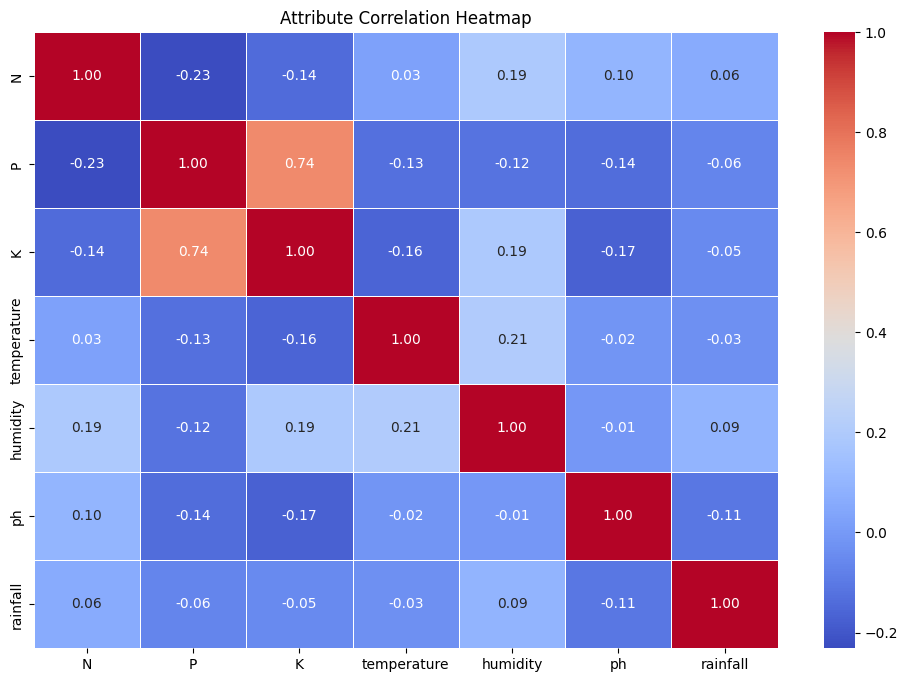

In [110]:
#visualizing  correlation with Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Heatmap for correlation visualization
plt.title('Attribute Correlation Heatmap')
plt.show()

### Encoding

In [ ]:
# Count the number of unique labels in the 'label' column of the crop DataFrame
crop['label'].nunique()

22

In [112]:
# Mapping crop labels to numerical values for better processing
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}


In [113]:
crop['crop_no'] = crop['label'].map(crop_dict)  # Mapping string labels to numerical values

In [114]:
# Displaying dataset after modification to verify changes
print(crop.head())  # Display first 5 rows
print(crop.tail())  # Display last 5 rows

    N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        1
        N   P   K  temperature   humidity        ph    rainfall   label  \
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      crop_no  
2195       22  
2196       22  
2197       22  
2198       22  
2199       22  


In [115]:
# Dropping the original label column as it's now mapped
crop.drop('label', axis=1, inplace=True)

In [116]:
# Verifying the changes after dropping the label column
print(crop.tail())

        N   P   K  temperature   humidity        ph    rainfall  crop_no
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293       22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041       22


### Train Test Split

In [117]:
# Checking if 'crop_no' exists before attempting to drop it
if 'crop_no' in crop.columns:
    # Dropping the 'crop_no' column from the dataset and storing the result in x
    x = crop.drop('crop_no', axis=1)
    
    # Extracting the 'crop_no' column as the target variable y and ensuring it's an integer type
    y = crop['crop_no'].astype(int)
    
    # Checking for missing values in x and y
    missing_x = x.isnull().sum().sum()
    missing_y = y.isnull().sum()
    
    print(f"The shape of x is : {x.shape}")
    print(f"The shape of y is : {y.shape}")
    
    # Displaying missing values count
    print(f"Missing values in x: {missing_x}")
    print(f"Missing values in y: {missing_y}")
    
    # Handling missing values (optional: drop or fill)
    if missing_x > 0 or missing_y > 0:
        print("Warning: Dataset contains missing values. Consider handling them.")

else:
    print("Error: Column 'crop_no' not found in DataFrame")


The shape of x is : (2200, 7)
The shape of y is : (2200,)
Missing values in x: 0
Missing values in y: 0


In [118]:
from sklearn.model_selection import train_test_split

# checking if x and y are empty before splitting
if x.empty or y.empty:
    print("Error: Features (x) or target (y) data is empty. Check your dataset.")
else:
    # Splitting the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=42, stratify=y if y.nunique() > 1 else None
    )

    # Printing dataset shapes after splitting
    print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

    # Checking class distribution in train & test sets
    print("Training set class distribution:\n", y_train.value_counts(normalize=True))
    print("Testing set class distribution:\n", y_test.value_counts(normalize=True))


x_train shape: (1760, 7), x_test shape: (440, 7)
y_train shape: (1760,), y_test shape: (440,)
Training set class distribution:
 crop_no
17    0.045455
8     0.045455
5     0.045455
18    0.045455
20    0.045455
13    0.045455
9     0.045455
22    0.045455
21    0.045455
12    0.045455
19    0.045455
3     0.045455
1     0.045455
16    0.045455
6     0.045455
15    0.045455
11    0.045455
2     0.045455
7     0.045455
14    0.045455
10    0.045455
4     0.045455
Name: proportion, dtype: float64
Testing set class distribution:
 crop_no
17    0.045455
2     0.045455
19    0.045455
15    0.045455
11    0.045455
18    0.045455
5     0.045455
6     0.045455
9     0.045455
10    0.045455
1     0.045455
13    0.045455
8     0.045455
14    0.045455
20    0.045455
22    0.045455
3     0.045455
21    0.045455
4     0.045455
12    0.045455
7     0.045455
16    0.045455
Name: proportion, dtype: float64


In [119]:
# Printing the shape of training and testing sets
print(f"Shape of x_train (training features): {x_train.shape}")  # Dimensions of training feature set
print(f"Shape of y_train (training target): {y_train.shape}")    # Dimensions of training target set
print(f"Shape of x_test (testing features): {x_test.shape}")    # Dimensions of testing feature set
print(f"Shape of y_test (testing target): {y_test.shape}")      # Dimensions of testing target set

# Verifying the proportion of data split
train_ratio = len(x_train) / (len(x_train) + len(x_test))
test_ratio = len(x_test) / (len(x_train) + len(x_test))
print(f"Training set ratio: {train_ratio:.2%}")
print(f"Testing set ratio: {test_ratio:.2%}")

# Checking if any data is missing after splitting
print(f"Missing values in x_train: {x_train.isnull().sum().sum()}")
print(f"Missing values in y_train: {y_train.isnull().sum()}")
print(f"Missing values in x_test: {x_test.isnull().sum().sum()}")
print(f"Missing values in y_test: {y_test.isnull().sum()}")

# Checking class distribution in y_train and y_test for classification tasks
if y_train.nunique() > 1:  
    print("Class distribution in y_train:\n", y_train.value_counts(normalize=True))
    print("Class distribution in y_test:\n", y_test.value_counts(normalize=True))


Shape of x_train (training features): (1760, 7)
Shape of y_train (training target): (1760,)
Shape of x_test (testing features): (440, 7)
Shape of y_test (testing target): (440,)
Training set ratio: 80.00%
Testing set ratio: 20.00%
Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0
Class distribution in y_train:
 crop_no
17    0.045455
8     0.045455
5     0.045455
18    0.045455
20    0.045455
13    0.045455
9     0.045455
22    0.045455
21    0.045455
12    0.045455
19    0.045455
3     0.045455
1     0.045455
16    0.045455
6     0.045455
15    0.045455
11    0.045455
2     0.045455
7     0.045455
14    0.045455
10    0.045455
4     0.045455
Name: proportion, dtype: float64
Class distribution in y_test:
 crop_no
17    0.045455
2     0.045455
19    0.045455
15    0.045455
11    0.045455
18    0.045455
5     0.045455
6     0.045455
9     0.045455
10    0.045455
1     0.045455
13    0.045455
8     0.045455
14    0.045455
20 

### Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()
# Applying scaling only to numerical features
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Convert the scaled data back to a DataFrame for better interpretability
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

# Print the mean and standard deviation after scaling
print(f"Mean of x_train_scaled (should be ~0):\n{x_train_scaled.mean().round(2)}")
print(f"Standard deviation of x_train_scaled (should be ~1):\n{x_train_scaled.std().round(2)}")


Mean of x_train_scaled (should be ~0):
N              0.0
P              0.0
K             -0.0
temperature    0.0
humidity      -0.0
ph             0.0
rainfall       0.0
dtype: float64
Standard deviation of x_train_scaled (should be ~1):
N              1.0
P              1.0
K              1.0
temperature    1.0
humidity       1.0
ph             1.0
rainfall       1.0
dtype: float64


### Training the Model

Decision Tree Classifier Accuracy: 98.41%

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00        20
           3       0.86      0.95      0.90        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.91      1.00      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       0.95      1.00      0.98        20
          17  

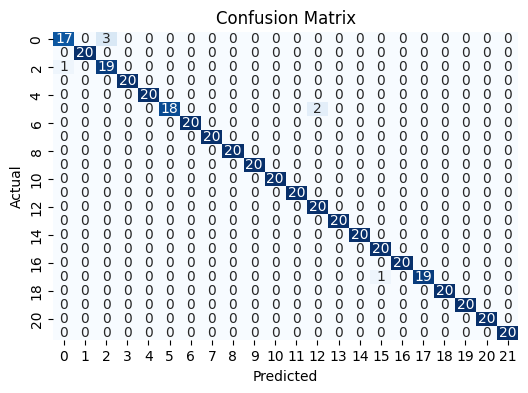

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing the Decision Tree Classifier with optimized hyperparameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42) 

# Training the classifier on the training set
clf.fit(x_train_scaled, y_train)

# Making predictions on the test set
y_pred = clf.predict(x_test_scaled)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2%}")

# Displaying a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Ploting  confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [122]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Initialize imputer with mean strategy (change to 'median' if data is skewed)
imputer = SimpleImputer(strategy='mean')

# Check for missing values before imputing
missing_values_before = x_train_scaled.isnull().sum().sum()
if missing_values_before > 0:
    print(f"Missing values before imputation: {missing_values_before}")

    # Apply imputation
    x_train_scaled = imputer.fit_transform(x_train_scaled)
    x_test_scaled = imputer.transform(x_test_scaled)

    # Convert back to DataFrame for easier handling
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

    # Check for missing values after imputation
    missing_values_after = x_train_scaled.isnull().sum().sum()
    print(f"Missing values after imputation: {missing_values_after}")

else:
    print("No missing values found. Skipping imputation.")


No missing values found. Skipping imputation.


In [123]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Initialize imputer with 'most_frequent' strategy (good for categorical & some numerical data)
imputer = SimpleImputer(strategy='most_frequent')

# Convert to DataFrame if input is not already in DataFrame format
if not isinstance(x_train_scaled, pd.DataFrame):
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)

if not isinstance(x_test_scaled, pd.DataFrame):
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

# Check for missing values before imputation
missing_train = x_train_scaled.isnull().sum().sum()
missing_test = x_test_scaled.isnull().sum().sum()

if missing_train > 0 or missing_test > 0:
    print(f"Missing values before imputation: {missing_train} in train, {missing_test} in test")

    # Apply imputation to both train and test sets
    x_train_scaled[:] = imputer.fit_transform(x_train_scaled)
    x_test_scaled[:] = imputer.transform(x_test_scaled)

    # Check for missing values after imputation
    missing_train_after = x_train_scaled.isnull().sum().sum()
    missing_test_after = x_test_scaled.isnull().sum().sum()
    print(f"Missing values after imputation: {missing_train_after} in train, {missing_test_after} in test")
    
else:
    print("No missing values found. Skipping imputation.")


No missing values found. Skipping imputation.


In [124]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# - Standardization (Z-score normalization) rescales features to have mean = 0 and standard deviation = 1
# - Helps improve performance of models that assume normally distributed data (e.g., Logistic Regression, SVM, KNN)
x_train_scaled = scaler.fit_transform(x_train)
# - This prevents data leakage by ensuring that test data is transformed using statistics learned only from training data.

c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Decision Tree Classifier Accuracy: 98.41%

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00        20
           3       0.86      0.95      0.90        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.91      1.00      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       0.95      1.00      0.98        20
          17  

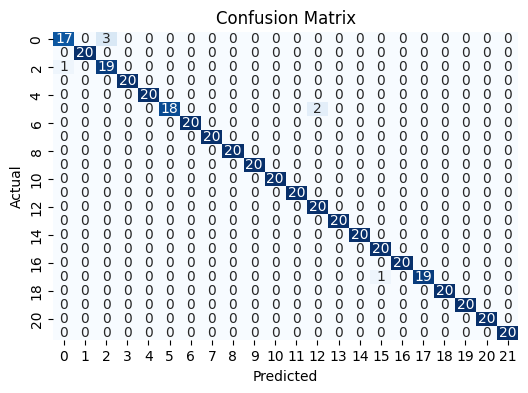

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Decision Tree Classifier with optimized hyperparameters
dtc = DecisionTreeClassifier(
    criterion='gini',        # Use 'entropy' if you prefer information gain as the criterion
    max_depth=10,            # Limits depth to prevent overfitting
    min_samples_split=5,     # Ensures nodes have at least 5 samples before splitting
    min_samples_leaf=2,      # Ensures leaf nodes have at least 2 samples
    random_state=42          # Ensures reproducibility
)

# Train the model on the scaled training data
dtc.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = dtc.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2%}")

# Display classification report for detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix to visualize predictions
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy Score: 98.41%

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00        20
           3       0.86      0.95      0.90        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.91      1.00      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       0.95      1.00      0.98        20
          17       1.00      1.00

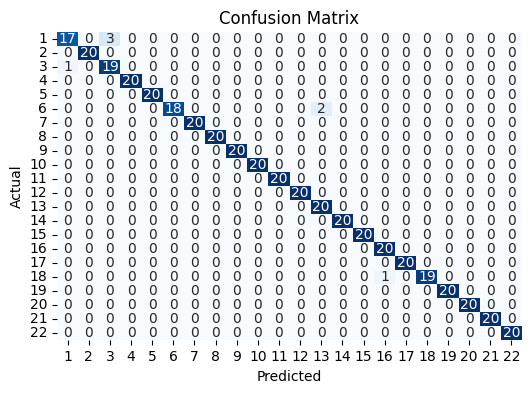

Misclassification Rate: 1.59%


In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test dataset
y_pred = dtc.predict(x_test_scaled)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2%}")

# Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Additional evaluation: Misclassification rate
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")


In [127]:
import numpy as np

def crop_rec(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predicts the best crop to grow based on soil and environmental factors.
    
    Parameters:
    N (float): Nitrogen level in the soil
    P (float): Phosphorus level in the soil
    K (float): Potassium level in the soil
    temperature (float): Temperature in degrees Celsius
    humidity (float): Humidity percentage
    ph (float): Soil pH level
    rainfall (float): Rainfall in mm
    
    Returns:
    str: Recommended crop to grow
    """
    try:
        # Validate input: Ensure all values are numeric
        inputs = [N, P, K, temperature, humidity, ph, rainfall]
        if not all(isinstance(i, (int, float)) for i in inputs):
            return "An Error Occured: All input values must be numbers."

        # Convert input into a NumPy array
        features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Scale the input data using the trained scaler
        transformed_features = scaler.transform(features)

        # Predict the crop using the trained Decision Tree model
        prediction = dtc.predict(transformed_features)

        # Dictionary mapping predicted class labels to crop names
        crop_dict = {
            1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
            6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
            11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
            16: "Blackgram", 17: "Mungbean", 18: "Mothbeans", 19: "Pigeonpeas",
            20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
        }

        # Get the crop name based on the predicted class
        crop = crop_dict.get(prediction[0], "Unknown Crop")

        return f"Recommended Crop: {crop} is the best crop to grow on this farm."

    except Exception as e:
        return f"An error occurred: {str(e)}"


In [128]:
# Example: Predicting the crop for the given environment
N = 90           # Nitrogen level in the soil
P = 42           # Phosphorus level in the soil
K = 43           # Potassium level in the soil
temperature = 20 # Temperature in degrees Celsius
humidity = 82    # Humidity percentage
ph = 6.1         # Soil pH level
rainfall = 202   # Rainfall in mm

# Get prediction
recommended_crop = crop_rec(N, P, K, temperature, humidity, ph, rainfall)

# Print the result with better formatting
print("=" * 50)
print(f"Input Environmental Conditions:")
print(f"Nitrogen (N): {N}")
print(f"Phosphorus (P): {P}")
print(f"Potassium (K): {K}")
print(f"Temperature: {temperature}°C")
print(f"Humidity: {humidity}%")
print(f"pH Level: {ph}")
print(f"Rainfall: {rainfall} mm")
print("=" * 50)
print(recommended_crop)
print("=" * 50)


Input Environmental Conditions:
Nitrogen (N): 90
Phosphorus (P): 42
Potassium (K): 43
Temperature: 20°C
Humidity: 82%
pH Level: 6.1
Rainfall: 202 mm
Recommended Crop: Rice is the best crop to grow on this farm.


c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
